# Ejercicio 5 Parcial 3 Introducción a la Teoría de Grafos

Sean $A$ y $B$ dos puntos en el plano. Sea $S$ un conjunto de obstáculos, el cual consta de segmentos de recta cuyos extremos son conocidos. El objetivo de este ejercicio es determinar la trayectoria de longitud mínima, que se debe de seguir para conectar a $A$ con $B$ sin atravesar el interior de ningún obstáculo. Se sabe que la trayectoria de longitud mínima es una línea poligonal cuyos vértices internos (si los hay) son extremos de elementos de $S$.

## Descripción del Algoritmo

### Instrucción:

Describa un algoritmo que tome como entrada $A$, $B$ y $S$, y regrese una trayectoria óptima.

### Propuesta:

- $A$, $B$ puntos en el plano
- $S ➡$ Conjunto de obstáculos, segmento de recta con extremos conocidos ($2$ puntos dados)

Para el desarrollo de nuestro algoritmo, usaremos una suerte de aplicación (variación) del algoritmo de Dijkstra.

El algoritmo recibirá tres parámetros, el punto de inicio $A$, el punto final $B$ y un conjunto de segmentos $S$ (posiblemente una lista de tuples de puntos extremos)

La idea es generar un grafo dirigido desde $A$, que contenga los vértices a los que puedo llegar desde $A$ sin atravesar los obstáculos.

Inicio desde $A$, agrego al grafo los puntos (de los extremos de los segmentos) a los cuales puedo llegar sin atravesar algún obstáculo, y agrego las aristas con peso de $A$ hasta el vértice. Añado $A$ a la lista visitados.

__Nota:__ La lista inicia con $B$ en ella, no quiero verificar cosas que salgan de $B$

Para cada uno de los vértices que se añaden al grafo se añaden aquellos a los que puedo llegar (excepto $A$ ni posiblemente su extremo adyacente por obstáculo) sin atravesar obstáculo. Añado este vértice al de los visitados y continúo revisando.

Cada vértice visitado es añadido a una lista de visitados, y para cada una de las aristas que añado, si al que incide no esta en los visitados, se agrega a una cola de vértices por visitar. Se continúa verificando hasta que no haya vértice en la cola que visitar. (En un máximo, verifico $2n+1$ puntos, con $2n+1$ validaciones por cada uno.

Una vez obtenido el grafo y sus pesos aplico el __Algoritmo de Dijkstra__.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque

In [2]:
# Función que recibe un vértice y un conjunto de obstáculos. Retorna el punto del otro extremo del obstáculo si vertice es un obstáculo, de lo contrario, devuelve None
def pareja(vertice, S):
    # Iteración sobre cada obstáculo
    for par in S:
        # Reviso si vertice es uno de los dos extremos del obstáculo, en caso afirmativo, retorno el contrario.
        if par[0][0] == vertice[0] and par[0][1] == vertice[1]:
            return par[1]
        if par[1][0] == vertice[0] and par[1][1] == vertice[1]:
            return par[0]
    return None

In [3]:
# Función que verifica si dos segmentos se intersecan o no
def verificadorInterseccion(segmento1, segmento2):
    # Asignación de puntos de los segmentos
    (A, B), (C, D) = segmento1, segmento2
    
    # Verifico si ninguno de los dos segmentos es vertical
    if (B[0] - A[0]) == 0 or (D[0] - C[0]) == 0:
        if (B[0] - A[0]) == 0 and (D[0] - C[0]) == 0:
            return False
        elif (B[0] - A[0]) == 0:
            if not (min(C[0], D[0]) < A[0] < max(C[0], D[0])):
                return False
            pendiente = (D[1] - C[1]) / (D[0] - C[0])
            interseccionOrigen = D[1] - (D[0] * pendiente)
            pasoPorX = (pendiente * B[0]) + interseccionOrigen
            if min(A[1], B[1]) < pasoPorX < max(A[1], B[1]):
                return True
            else:
                return False
        else:
            if not (min(A[0], B[0]) < C[0] < max(A[0], B[0])):
                return False
            pendiente = (B[1] - A[1]) / (B[0] - A[0])
            interseccionOrigen = B[1] - (B[0] * pendiente)
            pasoPorX = (pendiente * D[0]) + interseccionOrigen
            if min(C[1], D[1]) < pasoPorX < max(C[1], D[1]):
                return True
            else:
                return False
    
    # Verifico si los dos segmentos son paralelos (de serlo, no habrá intersección entre ellos)
    pendiente1 = (B[1] - A[1]) / (B[0] - A[0])
    pendiente2 = (D[1] - C[1]) / (D[0] - C[0])
    if pendiente1 == pendiente2:
        return False
    else:
        b1 = B[1] - pendiente1 * B[0]
        b2 = D[1] - pendiente2 * D[0]
        x = (b2 - b1) / (pendiente1 - pendiente2)
        y = pendiente1 * x + b1
        if (min(A[0], B[0]) < x < max(A[0], B[0])) and (min(C[0], D[0]) < x < max(C[0], D[0])):
            return True
        return False
    

In [4]:
# Función que recibe como parámetro un vértice v, un conjunto de puntos F y un conjunto de obstáculos S. Devuelve aquellos puntos de F que al hacer un segmento con el vértice v, no interseca a ningún obstáculo de S
def posiblesExtremos(v, F, S):
    # Lista de puntos extremos de F que cumplen las condiciones
    extremos = F[:]
    # Iteración sobre cada punto de F
    for punto in F:
        # Creación del posible segmento
        segmento = (v, punto)
        # Iteración sobre los obstáculos para verificar si hay intersección con alguno de ellos
        for obstaculo in S:
            # Condicional de existencia de la intersección, en caso afirmativo, se cambia el valor de intersecta y se acaba el ciclo sobre los obstáculos
            if verificadorInterseccion(segmento, obstaculo):
                extremos.remove(punto)
                break
    return extremos

In [5]:
# Función que devuelve la distancia entre dos puntos del plano
def distancia(punto1, punto2):
    # Uso de Pitágoras con la distancia entre los puntos correspondientes
    distancia = math.sqrt((punto2[0] - punto1[0]) ** 2 + (punto2[1] - punto1[1]) ** 2)
    # Redondeo para mejor visualización
    distancia_redondeada = round(distancia, 2)
    return distancia_redondeada

In [6]:
def caminoSinObstaculos(A, B, S):
    # Agrego puntos a una lista de vértices. Inicio con el punto inicial y el punto final
    vertices = [A, B]
    # Se añaden al conjunto de vértices a los puntos correspondientes a los extremos de los segmentos que simulan nuestros obstáculos
    for obstaculo in S:
        vertices.append(obstaculo[0])
        vertices.append(obstaculo[1])
    
    # Inicializo la lista de vértices "visitados". (Se inicia con el vértice B para no visitarlo nunca.)
    visitados = [B]
    # Inicializo la cola de vértices a revisar.
    porVisitar = deque()
    # Agrego nuestro vértice de caso base, el punto inicial.
    porVisitar.append(A)
    
    # Creación del grafo que almacenará los posibles segmentos. Será un digraph.
    G = nx.DiGraph()
    
    # Ciclo que se desarrolla mientras haya vértices por visitar, es decir, mientras que porVisitar sea no vacío
    while len(porVisitar) != 0:
        # Obtengo el vértice que estoy visitando y lo saco de la cola.
        vertice = porVisitar.popleft()
        # Agrego el vértice a la lista de vértices visitados.
        visitados.append(vertice)
        # Copia de los vértices. Será la lista de puntos de segmentos desde vertice que no se cruzan con ningún obstáculo.
        verificaciones = vertices[:]
        # Elimino el vértice en cuestión
        verificaciones.remove(vertice)
        # Condición de eliminación de vértice adyacente (aquel vértice que es pareja en uno de los obstáculos)
        if pareja(vertice, S) is not None:
            # Elimino el vértice pareja del vértice en cuestión, así evito que se validen segmentos que son en sí un obstáculo
            verificaciones.remove(pareja(vertice, S))
        
        # Si el vértice no está en el grafo, lo añado
        if vertice not in G.nodes:
            G.add_node(vertice)
        # Llamo al método cruces para obtener los extremos de los posibles segmentos que no se cortan con ningún otro segmento.
        extremos = posiblesExtremos(vertice, verificaciones, S)
        # Iteración sobre los extremos de los segmentos
        for punto in extremos:
            # Verifico si el punto en cuestión no ha sido visitado previamente
            if punto not in visitados and punto not in porVisitar:
                # Agrego el punto a la cola para visitarlo
                porVisitar.append(punto)
                # Agrego el vértice al grafo generado
                G.add_node(punto)
            # Añado la arista desde el vértice en cuestión al punto que es de utilidad con atributo de peso (correspondiente a la distancia de los puntos en el plano)
            G.add_weighted_edges_from([(vertice, punto, distancia(vertice, punto))])
            
        # GRAFICACIÓN PARCIAL AUXILIAR DEL GRAFO OBTENIDO
        # Asignación de posiciones en el plano para cada vértice
        # node_positions = {node: node for node in G.nodes()}
        # 
        # # Dibujar el grafo
        # plt.figure()
        # nx.draw(G, pos=node_positions, with_labels=True, node_size=1250, node_color='skyblue', font_weight='bold', font_size=8)
        # labels = nx.get_edge_attributes(G, 'weight')
        # nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=labels)
        # plt.title("Grafo obtenido")
        # plt.show()
            
    # Generación del camino más corto de acuerdo al grafo obtenido en el proceso anterior. Este camino corresponderá al camino más corto para ir del punto A al punto B
    caminoMasCorto = nx.dijkstra_path(G, A, B)
    
# GRAFICACIÓN DEL GRAFO OBTENIDO
    # Asignación de posiciones en el plano para cada vértice
    node_positions = {node: node for node in G.nodes()}

    # Dibujar el grafo
    plt.figure()
    nx.draw(G, pos=node_positions, with_labels=True, node_size=1250, node_color='skyblue', font_weight='bold', font_size=8)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=labels)
    plt.title("Grafo obtenido")
    plt.show()


# GRAFICACIÓN DEL CAMINO MÁS CORTO ENTRE LOS DOS PUNTOS Y DE LOS SEGMENTOS EN EL PROBLEMA
    # Generación de los segmentos del camino
    trayectoria = []
    for i in range(len(caminoMasCorto) - 1):
        trayectoria.append((caminoMasCorto[i], caminoMasCorto[i + 1]))
    
    # Configurar el gráfico
    fig, ax = plt.subplots()
    
    # Dibujar los segmentos del camino
    for segmento in trayectoria:
        x_coords = [segmento[0][0], segmento[1][0]]
        y_coords = [segmento[0][1], segmento[1][1]]
        ax.plot(x_coords, y_coords, marker='o', color='blue')
        
    # Dibujar los obstáculos
    for segment in S:
        x = [segment[0][0], segment[1][0]]
        y = [segment[0][1], segment[1][1]]
        ax.plot(x, y, marker='x', color='red', linestyle='--', linewidth=2)
        
    # Configuración de las etiquetas de puntos inicial y final
    offset = 0.2
    ax.text(A[0] - offset, A[1] + offset, "A", fontsize=12)
    ax.text(B[0] + offset, B[1] + offset, "B", fontsize=12)
    
    # Añadir detalles al gráfico
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Gráfico de Camino más Corto entre los dos Puntos')
    plt.grid(True)
    plt.axis('equal')
    
    # Mostrar el gráfico
    plt.show()
    
    
# MUESTRA DE LONGITUD DEL CAMINO
    # Obtención de la longitud del camino obtenido
    path_length = sum(G[caminoMasCorto[i]][caminoMasCorto[i + 1]]['weight'] for i in range(len(caminoMasCorto) - 1))
    path_length = round(path_length, 2)
    # Impresión
    print(f"La longitud del camino más corto para ir desde {A} hasta {B} teniendo en cuenta los obstáculos es {path_length}")

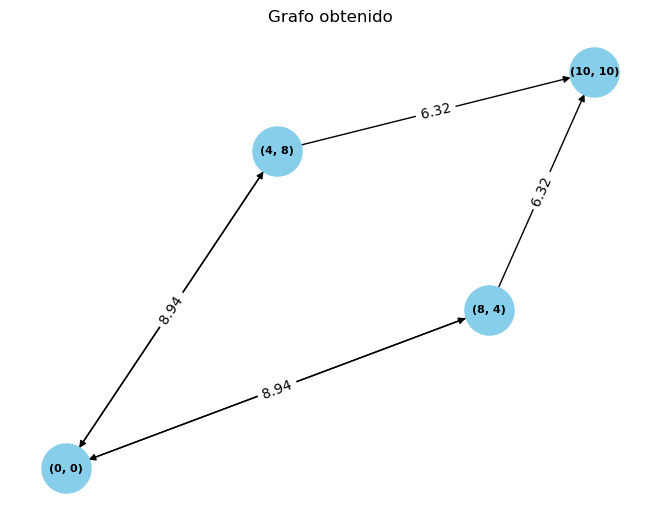

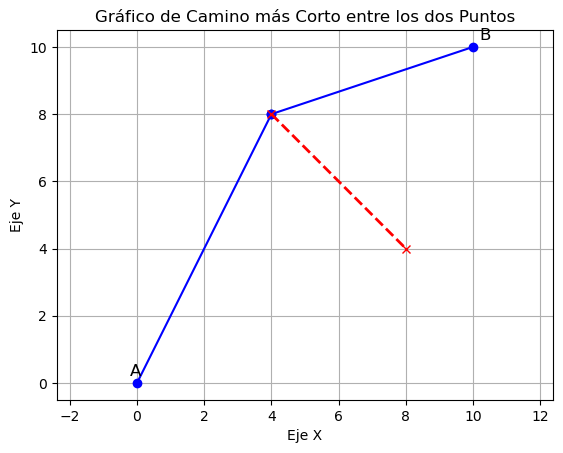

La longitud del camino más corto para ir desde (0, 0) hasta (10, 10) teniendo en cuenta los obstáculos es 15.26


In [7]:
A = (0, 0)
B = (10, 10)
S = [((4, 8), (8, 4))]
caminoSinObstaculos(A, B, S)

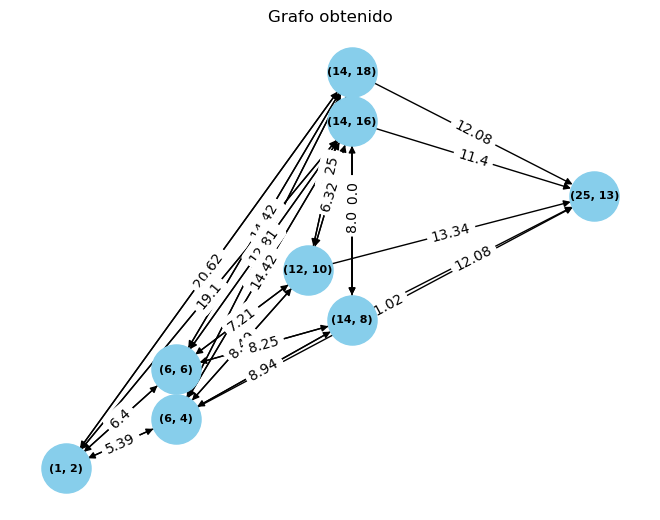

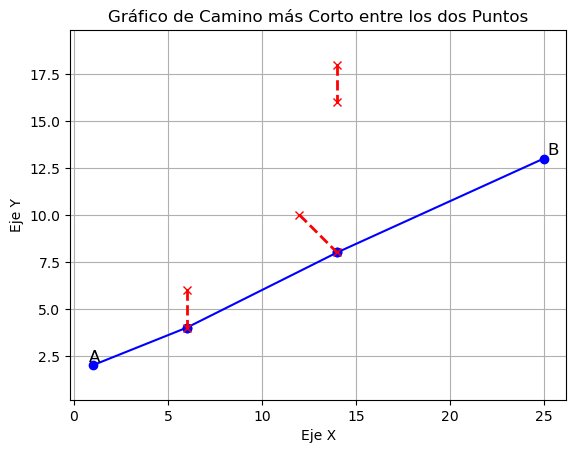

La longitud del camino más corto para ir desde (1, 2) hasta (25, 13) teniendo en cuenta los obstáculos es 26.41


In [9]:
A = (1, 2)
B = (25, 13)
S = [((6, 6), (6, 4)), ((12, 10), (14, 8)), ((14, 18), (14, 16))]
caminoSinObstaculos(A, B, S)

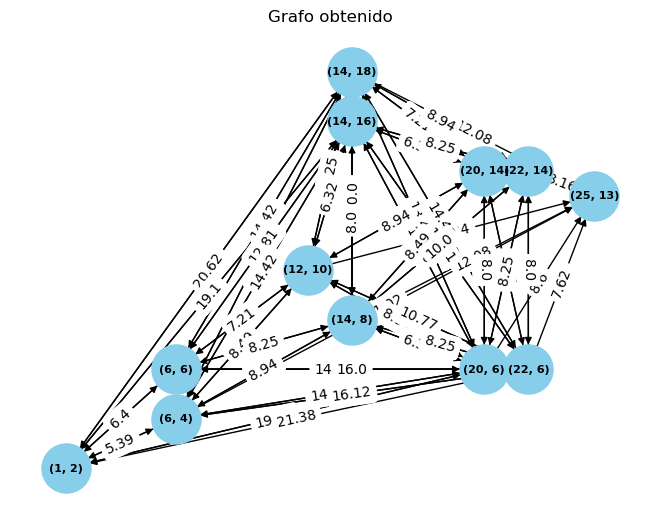

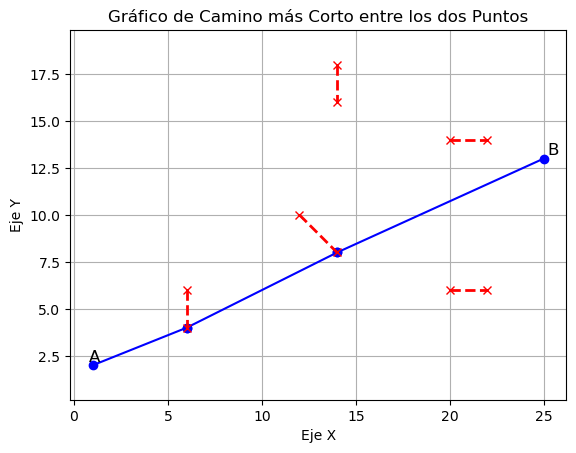

La longitud del camino más corto para ir desde (1, 2) hasta (25, 13) teniendo en cuenta los obstáculos es 26.41


In [10]:
A = (1, 2)
B = (25, 13)
S = [((6, 6), (6, 4)), ((12, 10), (14, 8)), ((14, 18), (14, 16)), ((20, 6), (22, 6)), ((20, 14), (22, 14))]
caminoSinObstaculos(A, B, S)

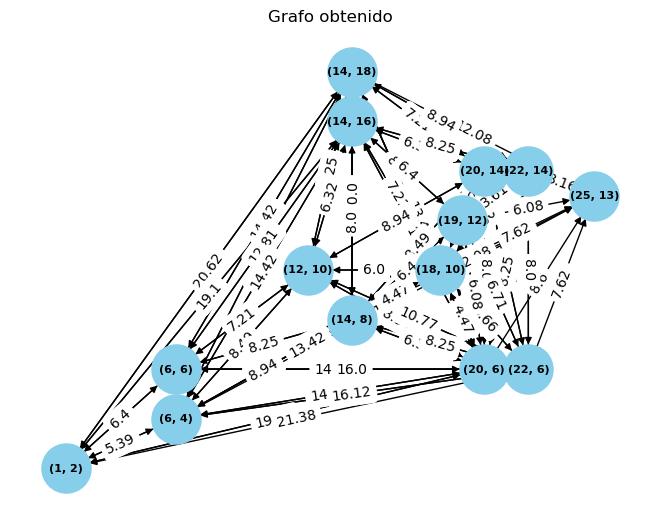

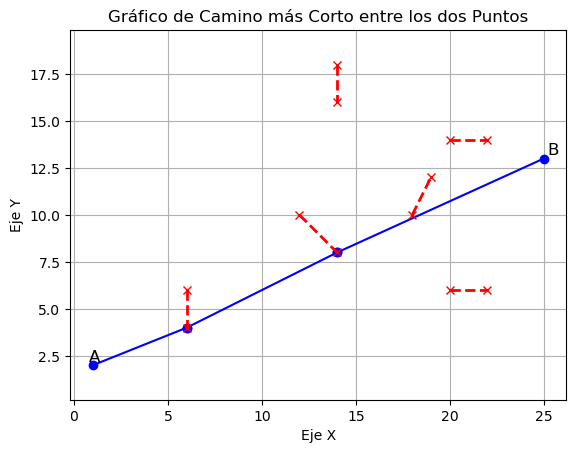

La longitud del camino más corto para ir desde (1, 2) hasta (25, 13) teniendo en cuenta los obstáculos es 26.41


In [11]:
A = (1, 2)
B = (25, 13)
S = [((6, 6), (6, 4)), ((12, 10), (14, 8)), ((14, 18), (14, 16)), ((20, 6), (22, 6)), ((20, 14), (22, 14)), ((18, 10), (19, 12))]
caminoSinObstaculos(A, B, S)

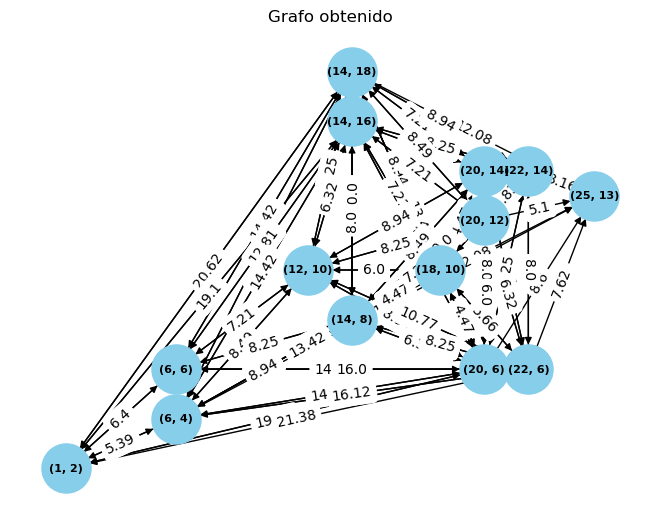

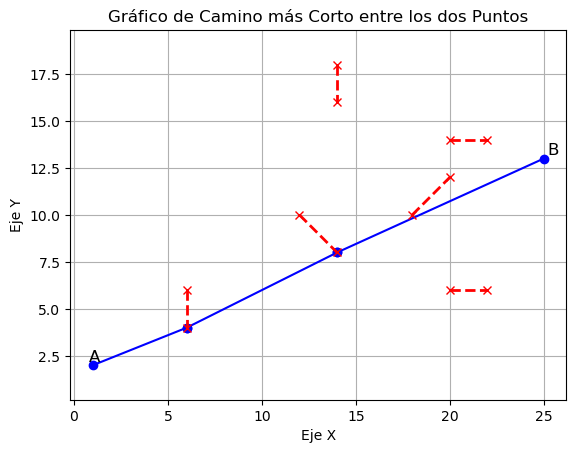

La longitud del camino más corto para ir desde (1, 2) hasta (25, 13) teniendo en cuenta los obstáculos es 26.41


In [12]:
A = (1, 2)
B = (25, 13)
S = [((6, 6), (6, 4)), ((12, 10), (14, 8)), ((14, 18), (14, 16)), ((20, 6), (22, 6)), ((20, 14), (22, 14)), ((18, 10), (20, 12))]
caminoSinObstaculos(A, B, S)